In [2]:
import sys
import os
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt

import pandas as pd

os.environ["USE_PYGEOS"] = "0"
import geopandas as gpd

sys.path.insert(0, "../src/helper")

from landprice_merger import (
    zensus_landprice_merger,
    landprice_neighborhood_merger,
    combine_landprice_with_geodata,
)
from csv_merger import combine_csvs
from principal_component_analysis import combine_PCA_datasets


In [3]:
cities = ["Berlin", "Bremen", "Dresden", "Frankfurt_am_Main", "Köln"]

main_path = os.path.join(os.getcwd(), "..")

path_zensus = os.path.join(main_path, "res", "data", "DLR", "2 Zensus")
path_land = os.path.join(main_path, "res", "data", "DLR", "1 Land Prices")
path_neigh = os.path.join(main_path, "res", "data", "DLR", "3 Neighborhoods")


In [4]:
df_zensus = combine_csvs(str_path=path_zensus)

gdf_zensus = combine_PCA_datasets(
    df_zensus=df_zensus, str_city=cities[3], str_path=path_zensus
)


ValueError: Found array with 0 sample(s) (shape=(0, 180)) while a minimum of 1 is required by the scale function.

In [28]:
df_land_prices = combine_csvs(str_path=path_land)

gdf_landprices = combine_landprice_with_geodata(
    df_landprice=df_land_prices, str_city=cities[3], str_path=path_land
)

gdf_landprices_names = landprice_neighborhood_merger(
    gdf_landprice=gdf_landprices, str_city=cities[3], str_path_neigh=path_neigh
)


In [38]:
df_land_prices[df_land_prices["City_Name"] == "Frankfurt am Main"]

,Neighborhood_FID,Land_Value,Area_Count,City_Name,AgriculturalArea,CommercialBuildingArea,Farmland,ForestryArea,GreenArea,IndustrialArea,MixedUseArea,OtherSpecialArea,Residential,SpecialUseArea,Village
289,1,6998.5,7,Frankfurt am Main,0,0,0,0,0,0,1,0,1,0,0
290,2,11756.9,21,Frankfurt am Main,0,0,0,0,0,0,1,0,1,1,0
291,3,5312.2,9,Frankfurt am Main,0,0,0,0,0,0,1,0,1,0,0
292,4,9779.6,20,Frankfurt am Main,0,1,0,0,0,0,1,0,1,1,0
293,5,4236.2,20,Frankfurt am Main,0,0,0,0,0,0,1,0,1,1,0
294,6,6407.0,17,Frankfurt am Main,0,0,0,0,0,0,1,0,1,1,0
295,7,5529.3,17,Frankfurt am Main,0,1,0,0,0,0,1,0,1,1,0
296,8,4334.1,20,Frankfurt am Main,0,1,0,0,0,0,1,0,1,0,0
297,9,3302.5,21,Frankfurt am Main,0,0,0,0,0,0,1,0,1,0,0
298,10,3374.7,14,Frankfurt am Main,0,1,0,0,0,0,1,0,1,0,0


In [ ]:
result = zensus_landprice_merger(
    gdf_landprices=gdf_landprices_names, gdf_zensus=gdf_zensus
)


In [ ]:
result

,Grid_Code,City_Code,geometry,buildings_total_units,n_owned_without_current_household,n_rented_without_current_household,n_vacation_and_leisure,n_vacant,we_public_companies,we_housing_cooperative,...,ForestryArea,GreenArea,IndustrialArea,MixedUseArea,OtherSpecialArea,Residential,SpecialUseArea,Village,Neighborhood_FID,Neighborhood_Name
0,100mN29902E42189,06412000,"POLYGON ((4218900.000 2990200.000, 4218900.000...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100mN29903E42189,06412000,"POLYGON ((4218900.000 2990300.000, 4218900.000...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100mN29903E42190,06412000,"POLYGON ((4219000.000 2990300.000, 4219000.000...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100mN29903E42191,06412000,"POLYGON ((4219100.000 2990300.000, 4219100.000...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100mN29904E42189,06412000,"POLYGON ((4218900.000 2990400.000, 4218900.000...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24844,100mN30133E42293,06412000,"POLYGON ((4229300.000 3013300.000, 4229300.000...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24845,100mN30134E42289,06412000,"POLYGON ((4228900.000 3013400.000, 4228900.000...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24846,100mN30134E42290,06412000,"POLYGON ((4229000.000 3013400.000, 4229000.000...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24847,100mN30135E42289,06412000,"POLYGON ((4228900.000 3013500.000, 4228900.000...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
ls_df_cities = []

for i in range(len(cities) -1):
    
    df_zensus = combine_csvs(str_path=path_zensus)

    gdf_zensus = combine_PCA_datasets(
    df_zensus=df_zensus, str_city=cities[i], str_path=path_zensus
    )

    df_land_prices = combine_csvs(str_path=path_land)

    gdf_landprices = combine_landprice_with_geodata(
        df_landprice=df_land_prices, str_city=cities[i], str_path=path_land
    )

    gdf_landprices_names = landprice_neighborhood_merger(
        gdf_landprice=gdf_landprices, str_city=cities[i], str_path_neigh=path_neigh
    )

    result = zensus_landprice_merger(
    gdf_landprices=gdf_landprices_names, gdf_zensus=gdf_zensus
    )

    result_grouped = result.groupby("Neighborhood_Name").median().reset_index()

    if cities[i] != "Frankfurt": 

        land_price_grid = gpd.read_file(path_neigh + "/Neighborhoods_" + cities[i] + ".gpkg")
        result_grouped = result_grouped.merge(land_price_grid, on = ["Neighborhood_Name", "Neighborhood_FID"])
        result_grouped_lm = result_grouped.drop(columns = ["Neighborhood_Name"])

        ls_df_cities.append(result_grouped_lm)
    elif cities[i] == "Frankfurt":

        land_price_grid = gpd.read_file(path_neigh + "/Neighborhoods_" + cities[i] + "_am_Main.gpkg")
        result_grouped = result_grouped.merge(land_price_grid, on = ["Neighborhood_Name", "Neighborhood_FID"])
        result_grouped_lm = result_grouped.drop(columns = ["Neighborhood_Name"])

        ls_df_cities.append(result_grouped_lm)b


C:\Users\ferdi\AppData\Local\Temp\ipykernel_10736\352095301.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_grouped = result.groupby("Neighborhood_Name").median().reset_index()
C:\Users\ferdi\AppData\Local\Temp\ipykernel_10736\352095301.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_grouped = result.groupby("Neighborhood_Name").median().reset_index()
C:\Users\ferdi\AppData\Local\Temp\ipykernel_10736\352095301.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify nu

In [107]:
df_all_cities = pd.concat(ls_df_cities).dropna(axis = 1)


### Berlin

In [232]:
df_berlin = ls_df_cities[0].drop(columns = ["geometry", "City_Name", "City_Code", "index_right", "Neighborhood_FID", "District_Name"])

<function matplotlib.pyplot.show(close=None, block=None)>

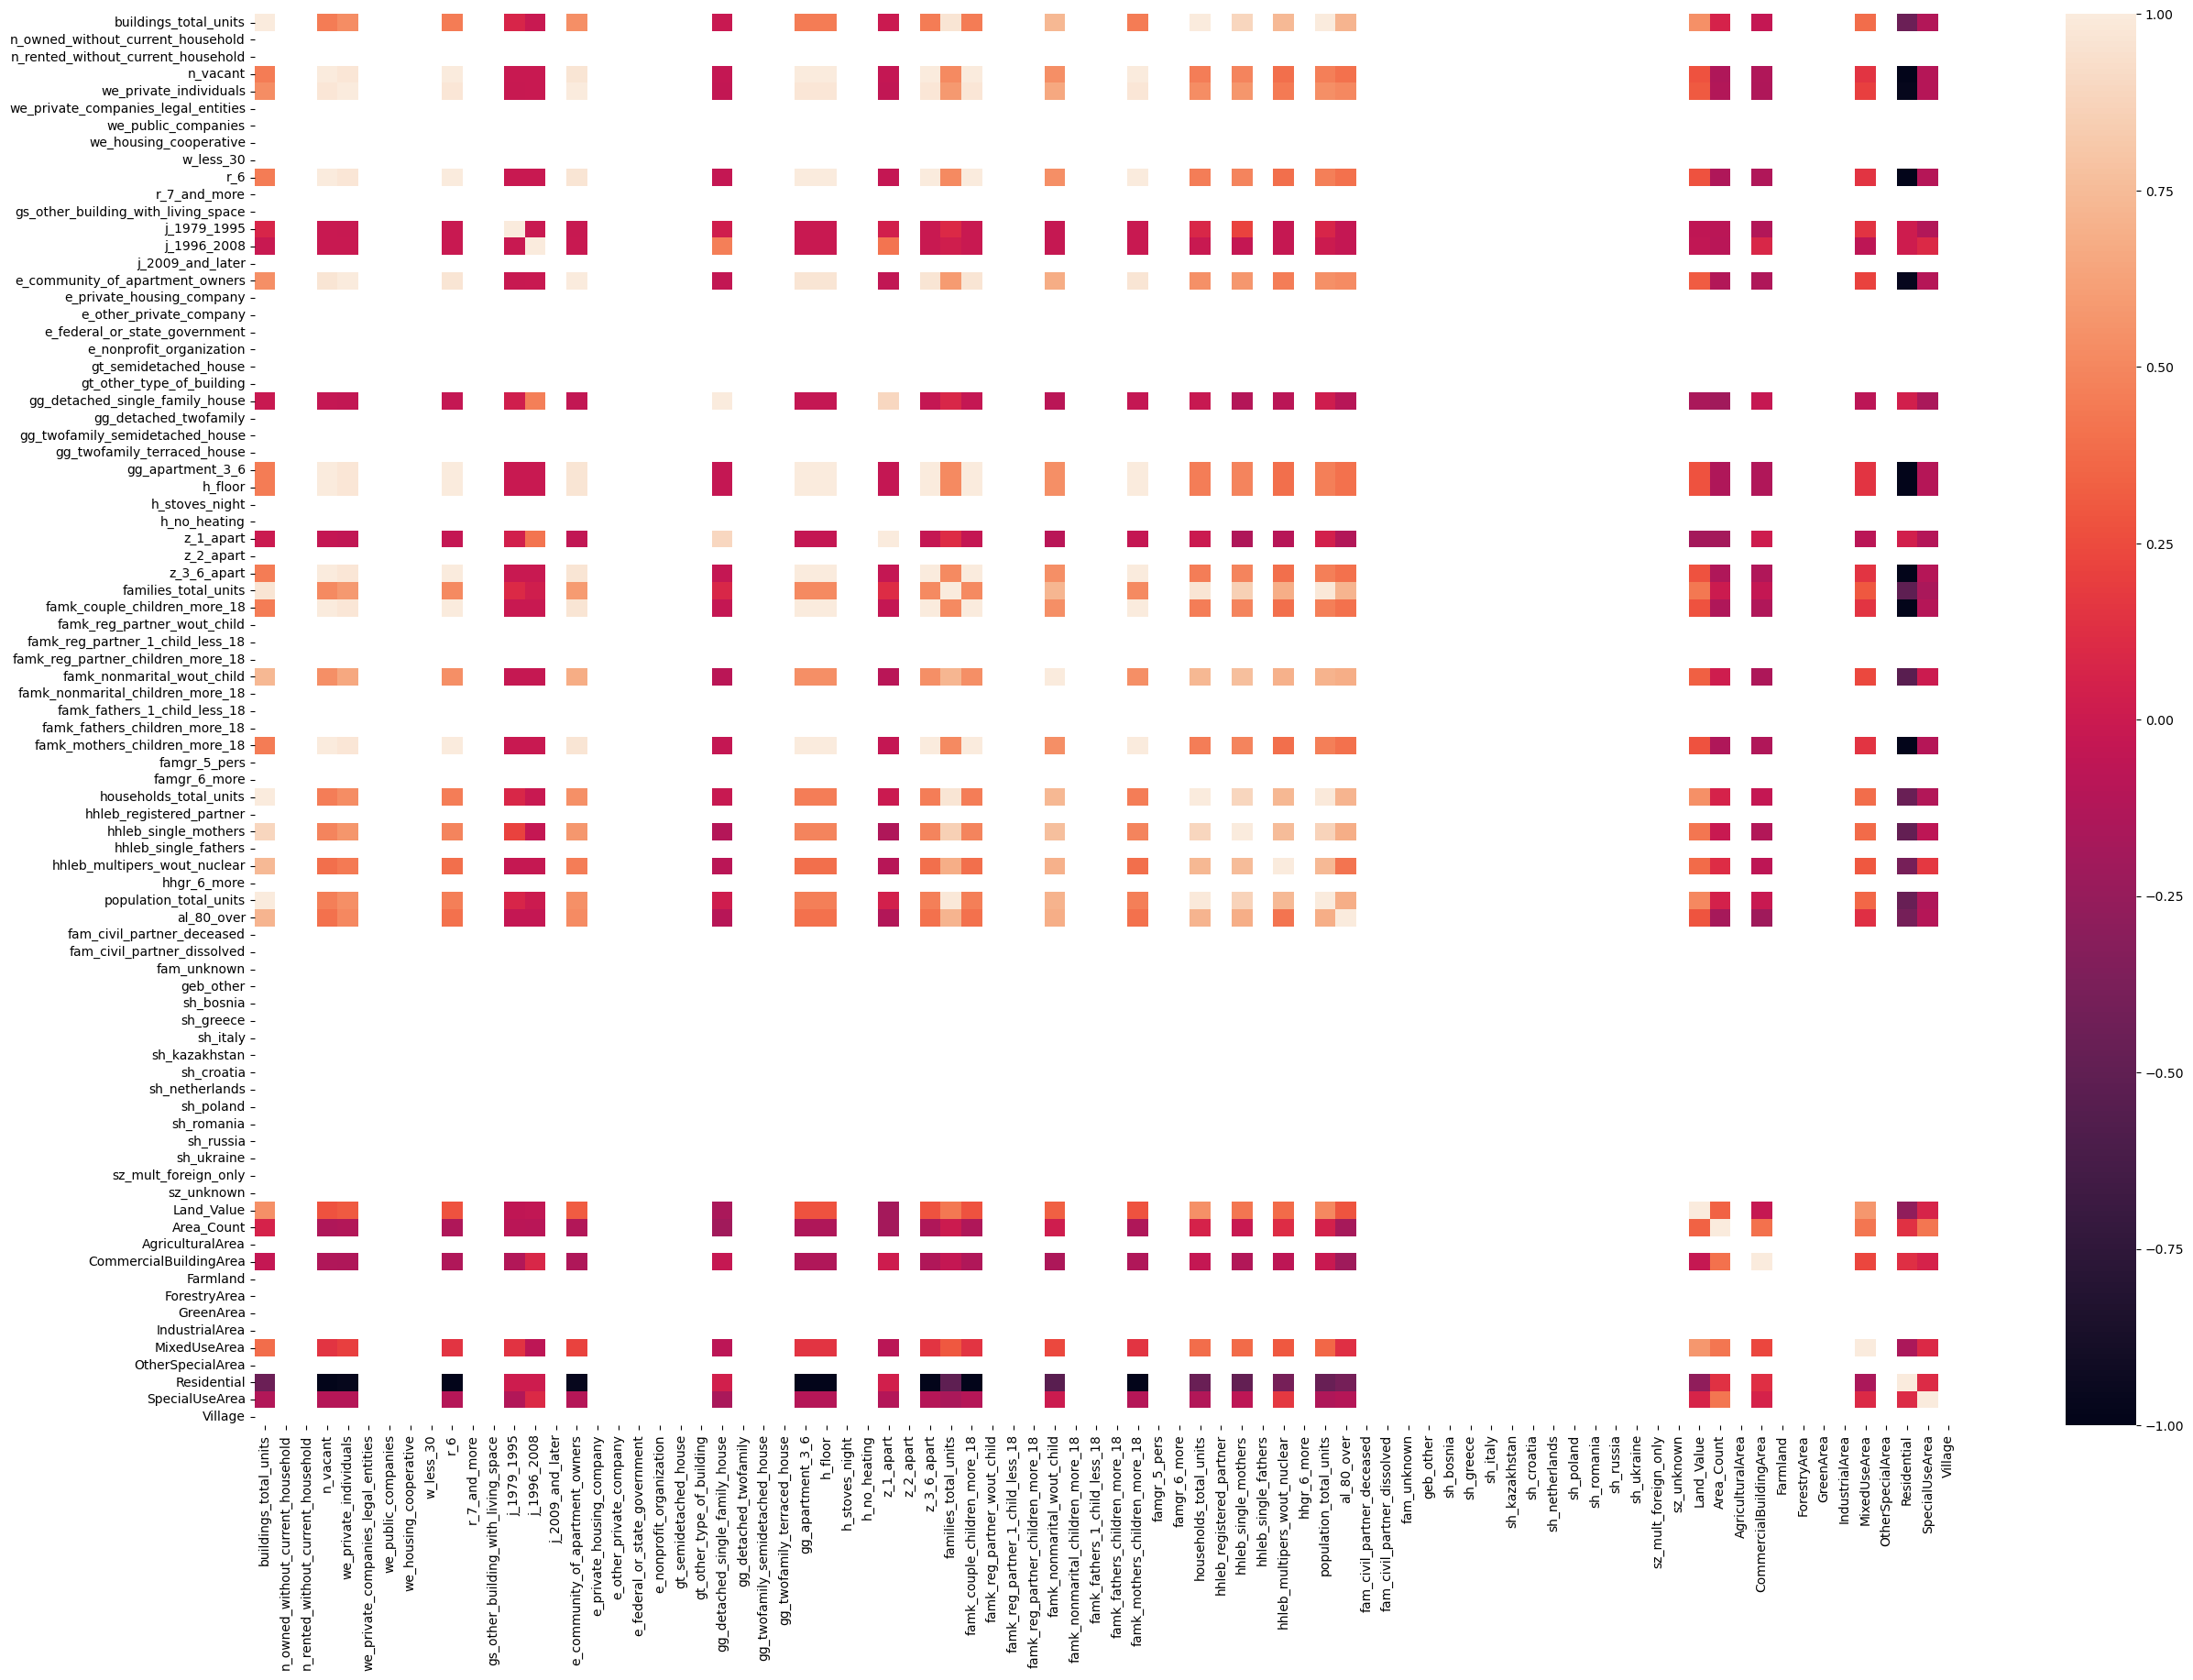

In [233]:
# calculate the correlation matrix
corr = df_berlin.corr()


plt.figure(figsize=(30,20))
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

plt.show

In [234]:
y = df_berlin["Land_Value"].values.reshape(-1, 1)
X = df_berlin.drop(columns = ["Land_Value"])[["buildings_total_units",
"population_total_units",
"households_total_units",
'Area_Count',
"n_vacant",
"MixedUseArea",
"r_6"]].values #'hhtyp_multiplepers_wout_nuclear',

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)


In [235]:

X2 = sm.add_constant(X_scaled)
est = sm.OLS(y_scaled, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     18.09
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           1.29e-13
Time:                        20:52:06   Log-Likelihood:                -97.945
No. Observations:                  96   AIC:                             209.9
Df Residuals:                      89   BIC:                             227.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.359e-16      0.071  -3.32e-15      1.0

In [236]:
regr = linear_model.LinearRegression()
regr.fit(X_scaled, y_scaled)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [-1.73258228e-16]
Coefficients: 
 [[ 6.47241395 -2.09168661 -4.02919833  0.18768221  0.06868621  0.26530001
   0.06868621]]


In [237]:
scores = cross_val_score(regr, X_scaled, y_scaled, cv = 5)
scores

array([0.53946558, 0.17260855, 0.49256476, 0.74438592, 0.19948849])

In [238]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.43 (+/- 0.43)


### Bremen

In [244]:
df_bremen = ls_df_cities[1].drop(columns = ["geometry", "City_Name", "City_Code", "index_right", "Neighborhood_FID", "District_Name"])

C:\Users\ferdi\AppData\Local\Temp\ipykernel_10736\1490041737.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_bremen.corr()


<function matplotlib.pyplot.show(close=None, block=None)>

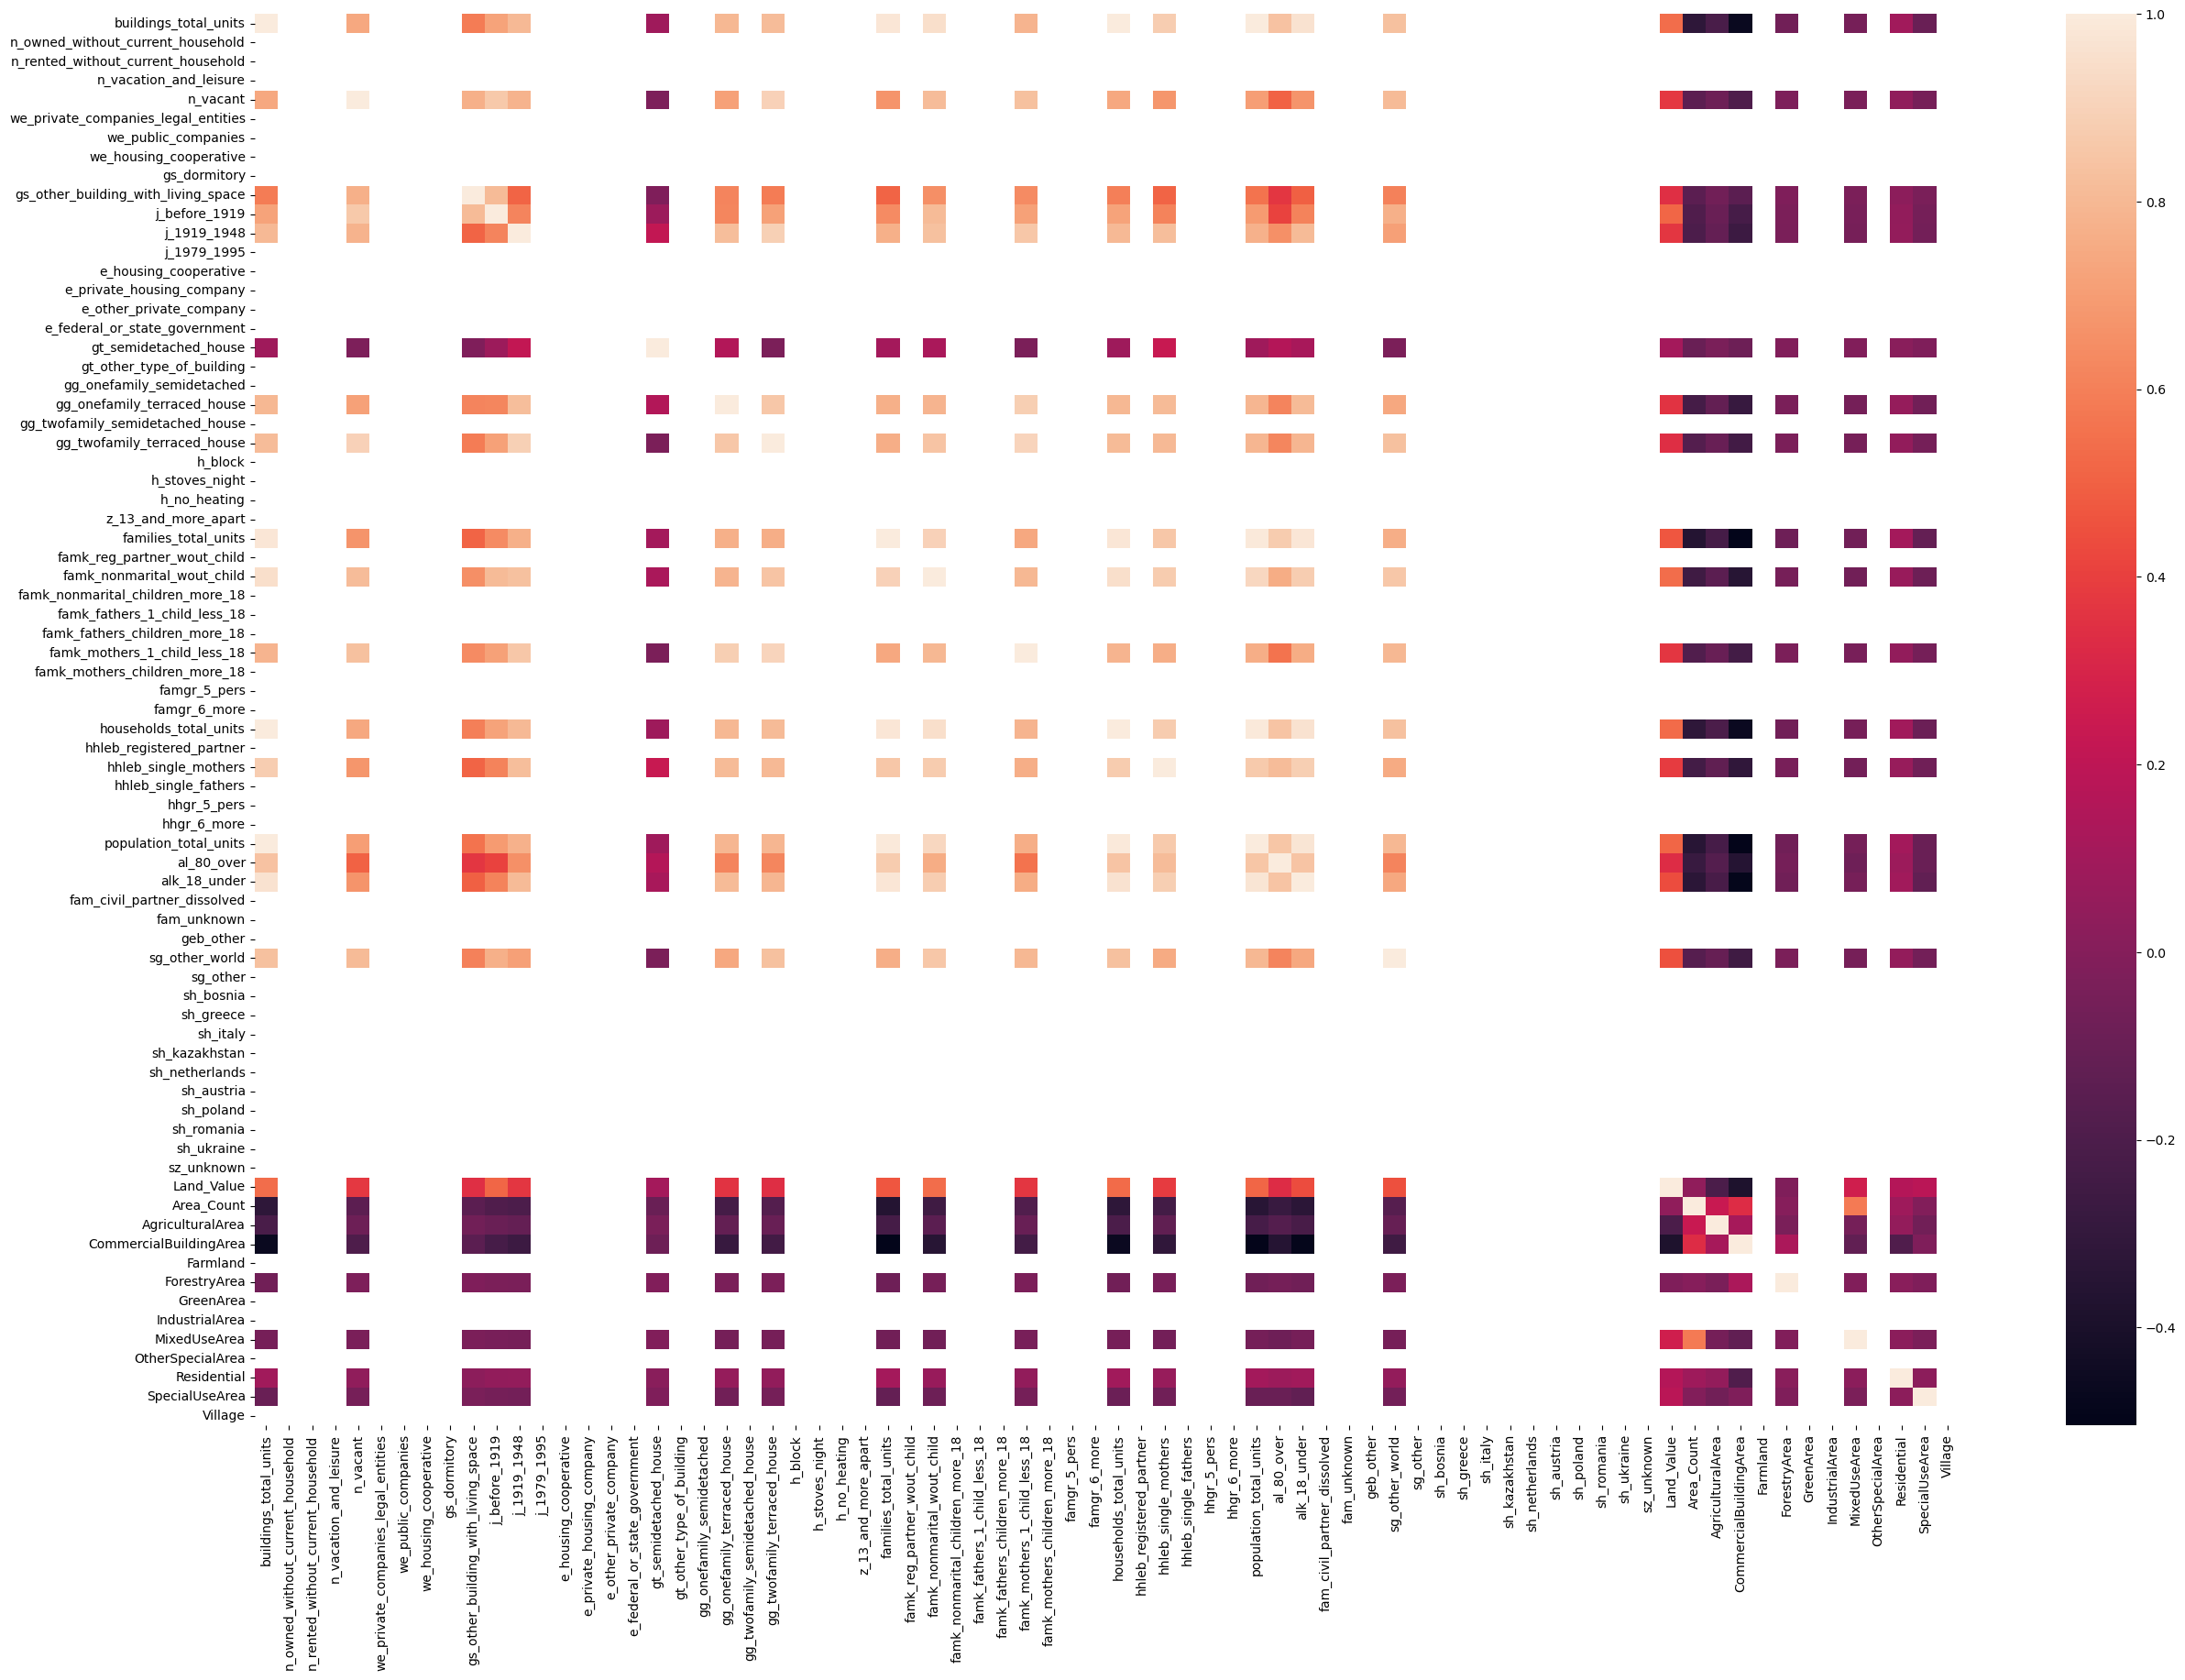

In [245]:
# calculate the correlation matrix
corr = df_bremen.corr()


plt.figure(figsize=(30,20))
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

plt.show

In [259]:
df_bremen.columns

Index(['buildings_total_units', 'n_owned_without_current_household',
       'n_rented_without_current_household', 'n_vacation_and_leisure',
       'n_vacant', 'we_private_companies_legal_entities',
       'we_public_companies', 'we_housing_cooperative', 'gs_dormitory',
       'gs_other_building_with_living_space', 'j_before_1919', 'j_1919_1948',
       'j_1979_1995', 'e_housing_cooperative', 'e_private_housing_company',
       'e_other_private_company', 'e_federal_or_state_government',
       'gt_semidetached_house', 'gt_other_type_of_building',
       'gg_onefamily_semidetached', 'gg_onefamily_terraced_house',
       'gg_twofamily_semidetached_house', 'gg_twofamily_terraced_house',
       'h_block', 'h_stoves_night', 'h_no_heating', 'z_13_and_more_apart',
       'families_total_units', 'famk_reg_partner_wout_child',
       'famk_nonmarital_wout_child', 'famk_nonmarital_children_more_18',
       'famk_fathers_1_child_less_18', 'famk_fathers_children_more_18',
       'famk_mothers_1_chi

In [264]:
y = df_bremen["Land_Value"].values.reshape(-1, 1)
X = df_bremen.drop(columns = ["Land_Value"])[["buildings_total_units",
"population_total_units",
"households_total_units",
'Area_Count',
"AgriculturalArea"]].values #'hhtyp_multiplepers_wout_nuclear',

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)


In [265]:
X2 = sm.add_constant(X_scaled)
est = sm.OLS(y_scaled, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     8.960
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           1.76e-07
Time:                        20:56:33   Log-Likelihood:                -101.09
No. Observations:                  87   AIC:                             216.2
Df Residuals:                      80   BIC:                             233.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -3.14e-16      0.086  -3.63e-15      1.0

In [266]:
scores = cross_val_score(regr, X_scaled, y_scaled, cv = 5)
scores

array([-0.05671536,  0.39245762, -0.88548065,  0.43337548,  0.39006715])

In [267]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.05 (+/- 1.01)


### Dresden

In [271]:
df_dresden = ls_df_cities[2].drop(columns = ["geometry", "City_Name", "City_Code", "index_right", "Neighborhood_FID"])

In [294]:
for column in df_dresden.columns:
    df_dresden[column] = df_dresden[column].astype(np.float64)

<function matplotlib.pyplot.show(close=None, block=None)>

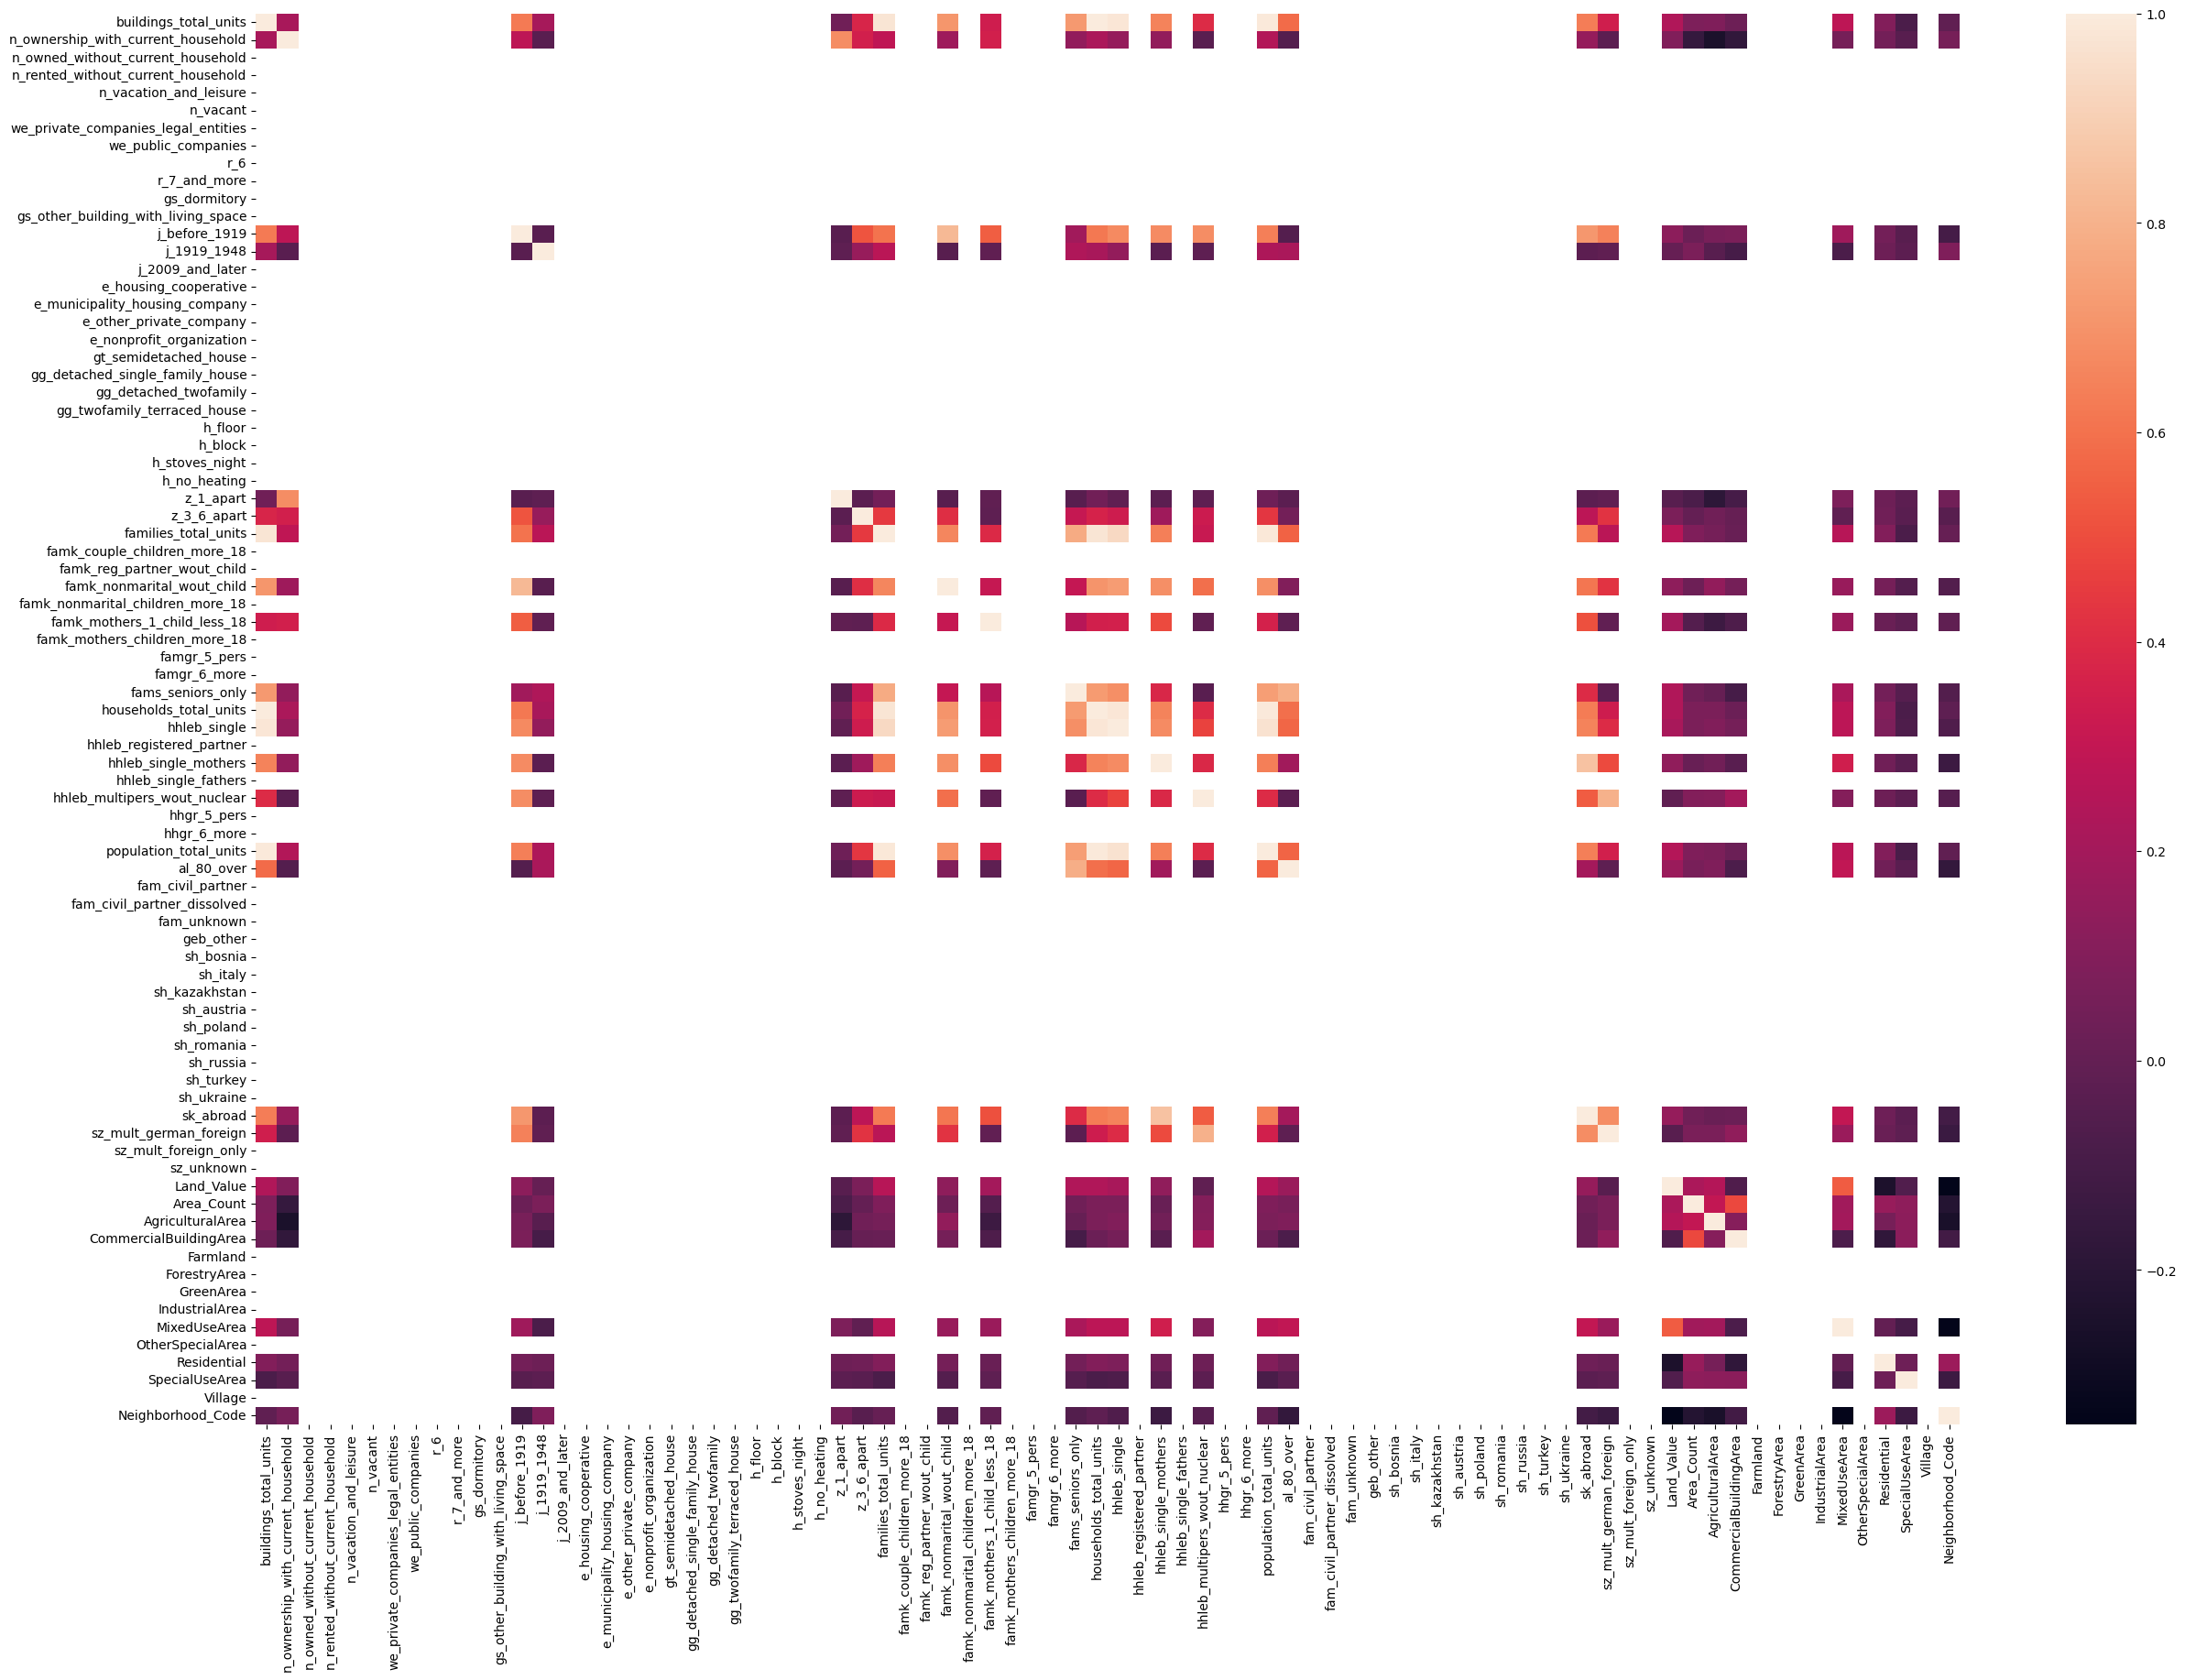

In [295]:
# calculate the correlation matrix
corr = df_dresden.corr()


plt.figure(figsize=(30,20))
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

plt.show

In [273]:
y = df_dresden["Land_Value"].values.reshape(-1, 1)
X = df_dresden.drop(columns = ["Land_Value"])[["buildings_total_units",
"population_total_units",
"households_total_units",
'Area_Count',
"AgriculturalArea"]].values #'hhtyp_multiplepers_wout_nuclear',

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

In [274]:
X2 = sm.add_constant(X_scaled)
est = sm.OLS(y_scaled, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     3.391
Date:                Sat, 29 Apr 2023   Prob (F-statistic):            0.00716
Time:                        21:00:31   Log-Likelihood:                -142.11
No. Observations:                 106   AIC:                             296.2
Df Residuals:                     100   BIC:                             312.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.11e-16      0.092   -1.2e-15      1.0

In [275]:
scores = cross_val_score(regr, X_scaled, y_scaled, cv = 5)
scores

array([-0.58650179, -0.11715274, -0.44974957,  0.4674205 ,  0.1560185 ])

In [276]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: -0.11 (+/- 0.77)


### Frankfurt am Main

In [280]:
df_frankfurt = ls_df_cities[3].drop(columns = ["geometry", "City_Name", "City_Code", "Neighborhood_FID"])

In [296]:
df_frankfurt

,buildings_total_units,n_owned_without_current_household,n_rented_without_current_household,n_vacation_and_leisure,n_vacant,we_public_companies,we_housing_cooperative,r_7_and_more,gs_other_building_with_living_space,j_1919_1948,...,CommercialBuildingArea,Farmland,ForestryArea,GreenArea,IndustrialArea,MixedUseArea,OtherSpecialArea,Residential,SpecialUseArea,Village


d:\Anaconda\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
d:\Anaconda\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<function matplotlib.pyplot.show(close=None, block=None)>

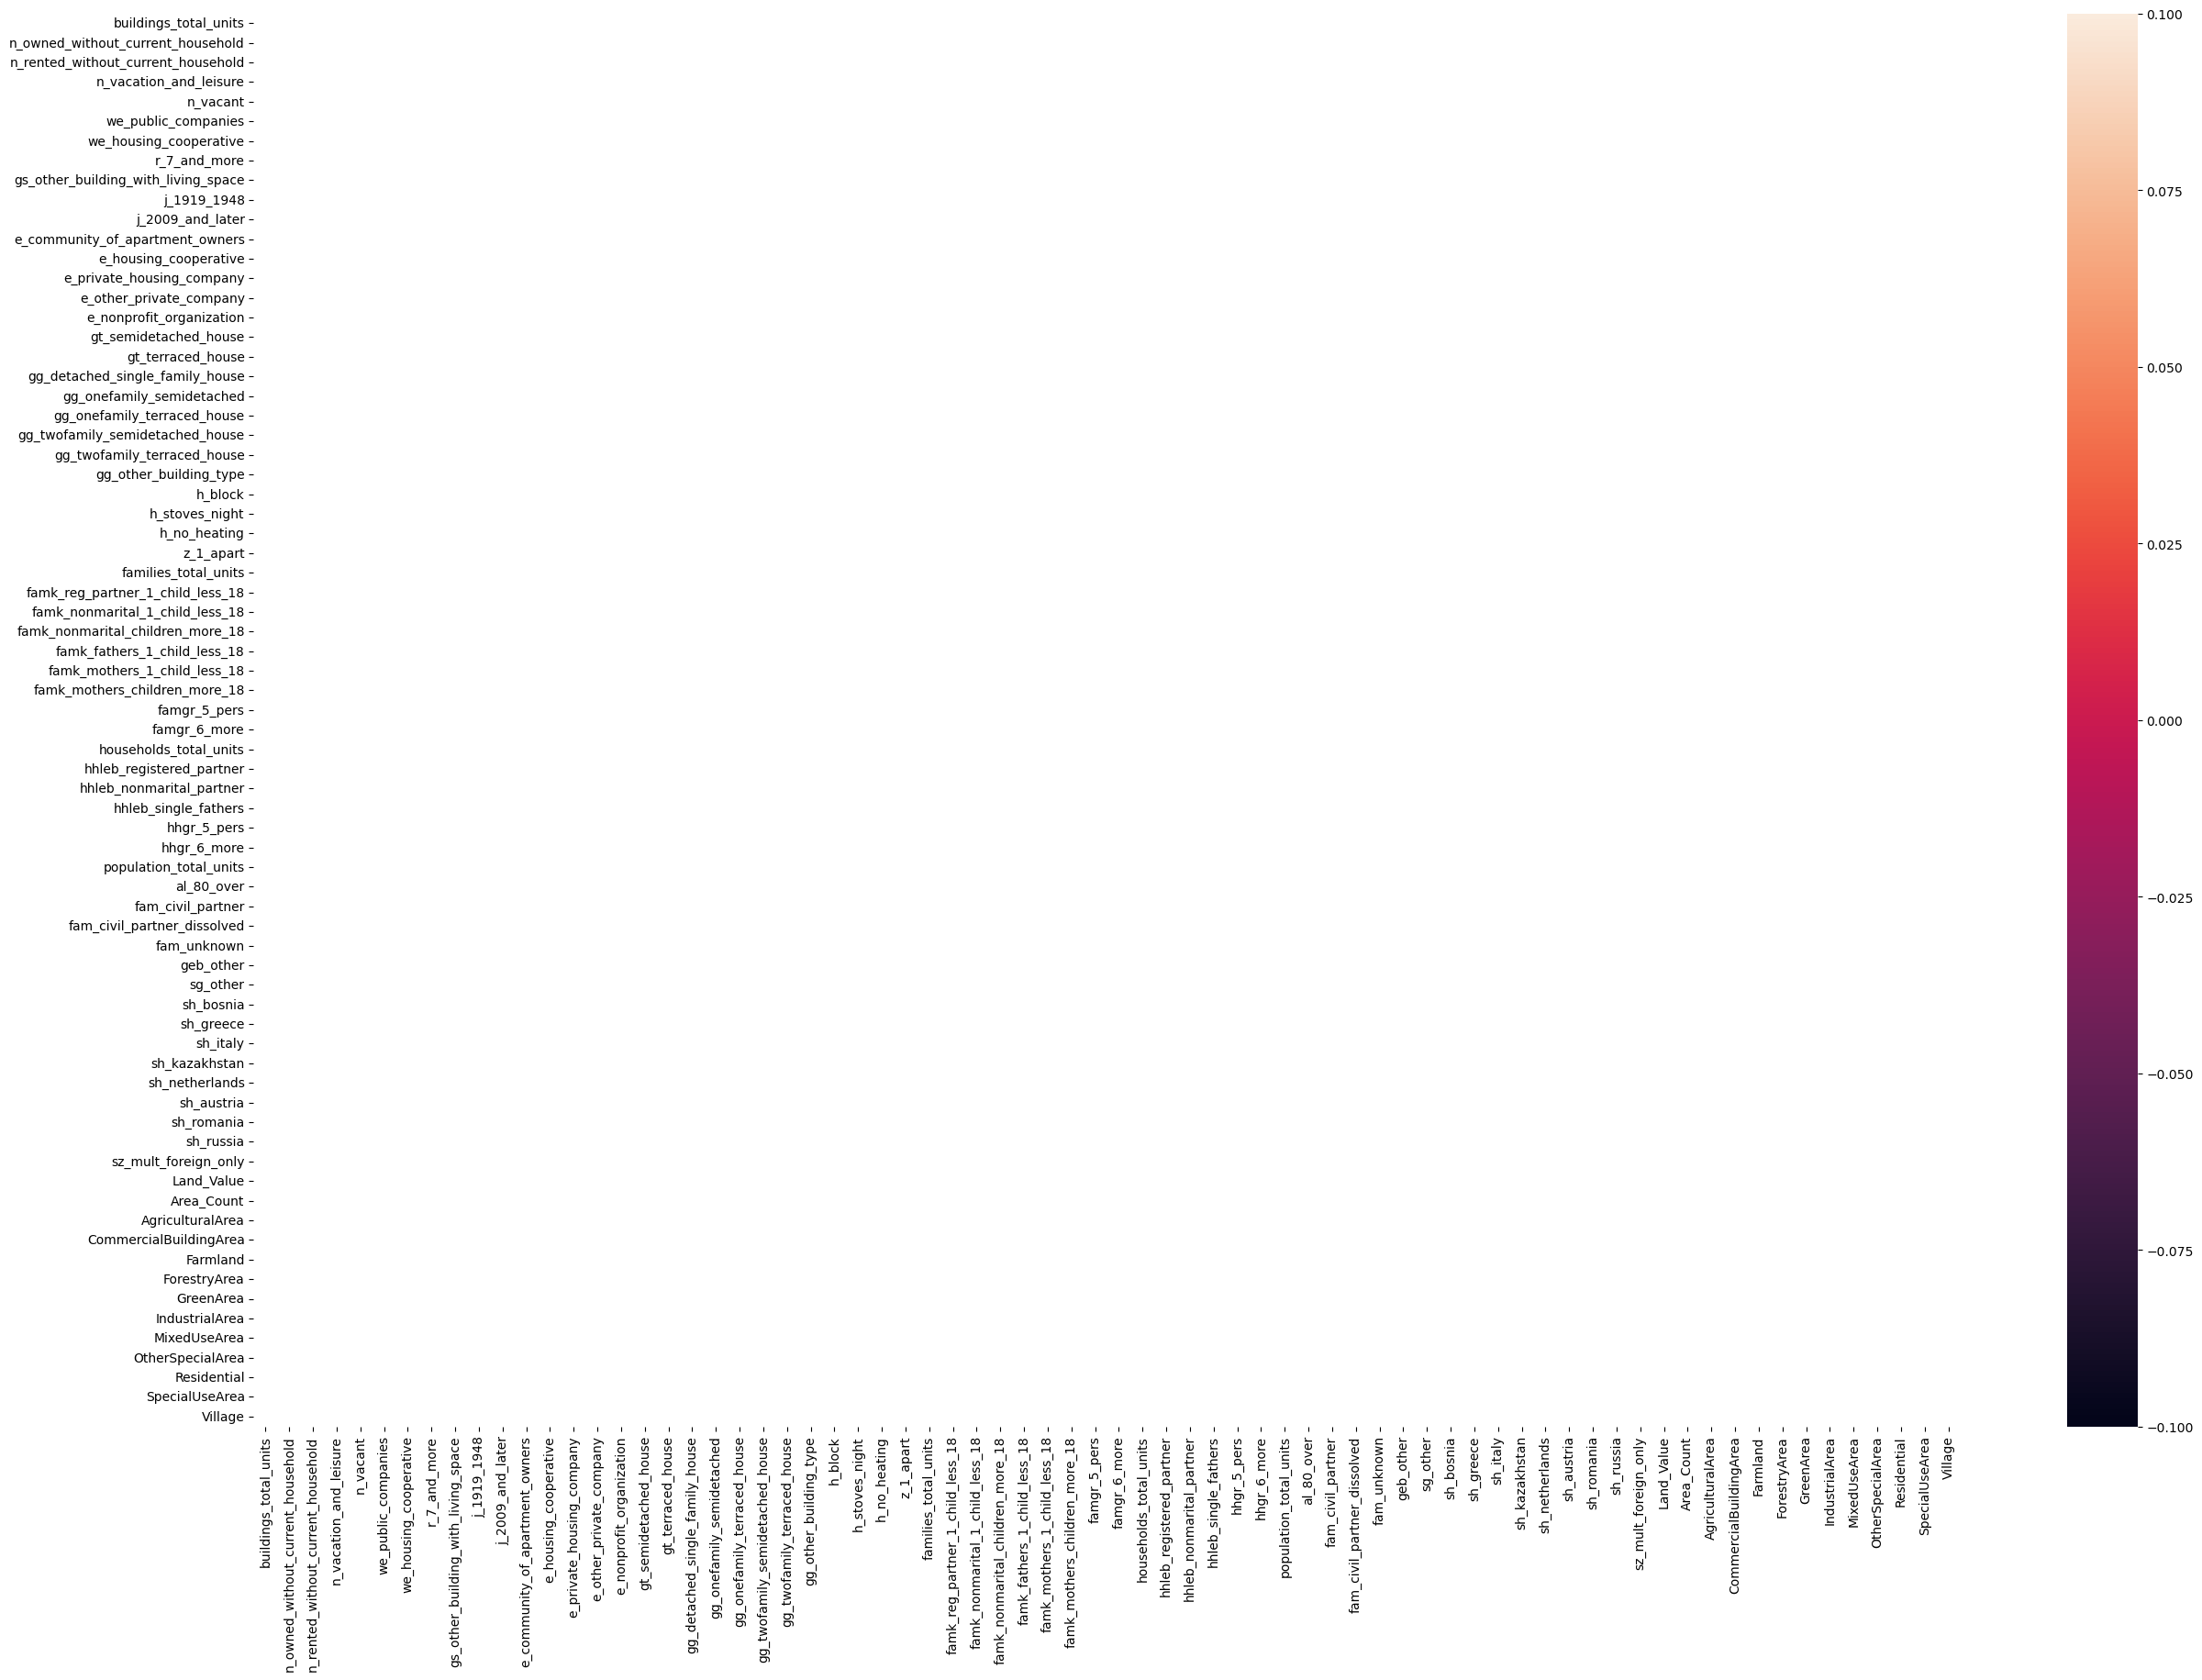

In [281]:
# calculate the correlation matrix
corr = df_frankfurt.corr()


plt.figure(figsize=(30,20))
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

plt.show

In [282]:
y = df_frankfurt["Land_Value"].values.reshape(-1, 1)
X = df_frankfurt.drop(columns = ["Land_Value"])[["buildings_total_units",
"population_total_units",
"households_total_units",
'Area_Count',
"AgriculturalArea"]].values #'hhtyp_multiplepers_wout_nuclear',

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

ValueError: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by StandardScaler.

In [ ]:
X2 = sm.add_constant(X_scaled)
est = sm.OLS(y_scaled, X2)
est2 = est.fit()
print(est2.summary())

In [ ]:
scores = cross_val_score(regr, X_scaled, y_scaled, cv = 5)
scores

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

### Koeln

In [29]:
df_koeln = ls_df_cities[4].drop(columns = ["geometry", "City_Name", "City_Code", "Neighborhood_FID"])

NameError: name 'ls_df_cities' is not defined

In [30]:
# calculate the correlation matrix
corr = df_koeln.corr()


plt.figure(figsize=(30,20))
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

plt.show

NameError: name 'df_koeln' is not defined

In [287]:
y = df_koeln["Land_Value"].values.reshape(-1, 1)
X = df_koeln.drop(columns = ["Land_Value"])[["buildings_total_units",
"population_total_units",
"households_total_units",
'Area_Count',
"AgriculturalArea"]].values #'hhtyp_multiplepers_wout_nuclear',

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

ValueError: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by StandardScaler.

In [ ]:
X2 = sm.add_constant(X_scaled)
est = sm.OLS(y_scaled, X2)
est2 = est.fit()
print(est2.summary())

In [ ]:
scores = cross_val_score(regr, X_scaled, y_scaled, cv = 5)
scores

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))